In [30]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
from iso3166 import countries
from datetime import datetime, timedelta

In [31]:
data = pd.read_csv('./data/space/mission_launches.csv')
data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [32]:
#Data info
print(f'Size of data is {data.shape}')
print(f'Any Nan values {data.isnull().sum().any()}')
print(f'Where are the Nan values {data.isnull().value_counts()}')
print(f'Duplicated values?: {data.duplicated().sum()}')

Size of data is (4324, 9)
Any Nan values True
Where are the Nan values Unnamed: 0.1  Unnamed: 0  Organisation  Location  Date   Detail  Rocket_Status  Price  Mission_Status
False         False       False         False     False  False   False          True   False             3360
                                                                                False  False              964
Name: count, dtype: int64
Duplicated values?: 0


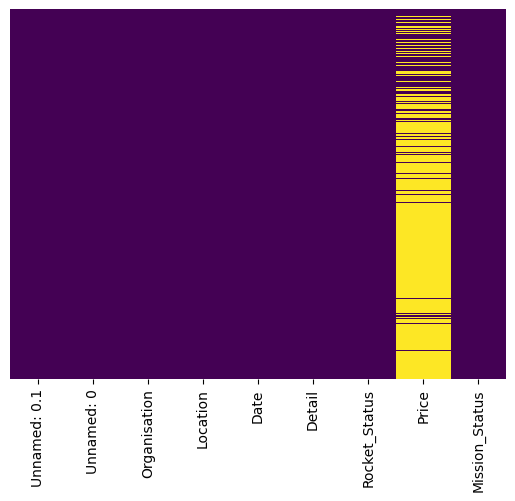

In [33]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [34]:
#Drop the price column becasue of a lot of missing values
data.drop('Price', axis=1, inplace=True)
data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,Success


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Mission_Status  4324 non-null   object
dtypes: int64(2), object(6)
memory usage: 270.4+ KB


In [36]:
data[['Day', 'Date']] = data['Date'].str.split(", ", expand=True)
data

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Mission_Status,Day
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020 05:12 UTC,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,Success,Fri Aug 07
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020 04:01 UTC,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,Success,Thu Aug 06
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020 23:57 UTC,Starship Prototype | 150 Meter Hop,StatusActive,Success,Tue Aug 04
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020 21:25 UTC,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,Success,Thu Jul 30
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020 11:50 UTC,Atlas V 541 | Perseverance,StatusActive,Success,Thu Jul 30
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958 07:33 UTC,Vanguard | Vanguard TV3BU,StatusRetired,Failure,Wed Feb 05
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958 03:48 UTC,Juno I | Explorer 1,StatusRetired,Success,Sat Feb 01
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957 16:44 UTC,Vanguard | Vanguard TV3,StatusRetired,Failure,Fri Dec 06
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957 02:30 UTC,Sputnik 8K71PS | Sputnik-2,StatusRetired,Success,Sun Nov 03


In [37]:
data['Year'] = data['Date'].str.slice(0,4)
data.drop('Date', axis=1, inplace=True)

In [38]:
data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace = True)
data

,Organisation,Location,Detail,Rocket_Status,Mission_Status,Day,Year
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,Success,Fri Aug 07,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,Success,Thu Aug 06,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA",Starship Prototype | 150 Meter Hop,StatusActive,Success,Tue Aug 04,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,Success,Thu Jul 30,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",Atlas V 541 | Perseverance,StatusActive,Success,Thu Jul 30,2020
...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",Vanguard | Vanguard TV3BU,StatusRetired,Failure,Wed Feb 05,1958
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",Juno I | Explorer 1,StatusRetired,Success,Sat Feb 01,1958
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",Vanguard | Vanguard TV3,StatusRetired,Failure,Fri Dec 06,1957
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",Sputnik 8K71PS | Sputnik-2,StatusRetired,Success,Sun Nov 03,1957


In [39]:
print(f'{data.Rocket_Status.value_counts()}')
print(f'{data.Mission_Status.value_counts()}')

Rocket_Status
StatusRetired    3534
StatusActive      790
Name: count, dtype: int64
Mission_Status
Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64


In [40]:
data.set_index('Year', inplace=True)
data

,Organisation,Location,Detail,Rocket_Status,Mission_Status,Day
Year,,,,,,
2020,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,Success,Fri Aug 07
2020,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,Success,Thu Aug 06
2020,SpaceX,"Pad A, Boca Chica, Texas, USA",Starship Prototype | 150 Meter Hop,StatusActive,Success,Tue Aug 04
2020,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,Success,Thu Jul 30
2020,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",Atlas V 541 | Perseverance,StatusActive,Success,Thu Jul 30
...,...,...,...,...,...,...
1958,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",Vanguard | Vanguard TV3BU,StatusRetired,Failure,Wed Feb 05
1958,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",Juno I | Explorer 1,StatusRetired,Success,Sat Feb 01
1957,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",Vanguard | Vanguard TV3,StatusRetired,Failure,Fri Dec 06


In [41]:
status = data.Mission_Status.value_counts()
fig = px.pie(labels=status.index, values=status.values, names = status.index, hole=0.5, color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_traces(textposition='outside', textinfo = 'percent+label')

fig.show()

In [42]:
rocket = data.Rocket_Status.value_counts()
fig = go.Figure(data=[go.Pie(labels=rocket.index, values= rocket.values, pull=[0, 0.5])])
fig.show()


In [43]:
data.head()

,Organisation,Location,Detail,Rocket_Status,Mission_Status,Day
Year,,,,,,
2020,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,Success,Fri Aug 07
2020,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,Success,Thu Aug 06
2020,SpaceX,"Pad A, Boca Chica, Texas, USA",Starship Prototype | 150 Meter Hop,StatusActive,Success,Tue Aug 04
2020,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,Success,Thu Jul 30
2020,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",Atlas V 541 | Perseverance,StatusActive,Success,Thu Jul 30


In [44]:
data['Country'] = data['Location'].str.split(",").str[-1].str.strip()
data['Country'].value_counts()

Country
Russia                            1395
USA                               1344
Kazakhstan                         701
France                             303
China                              268
Japan                              126
India                               76
Pacific Ocean                       36
New Zealand                         13
Iran                                13
Israel                              11
Kenya                                9
Australia                            6
North Korea                          5
New Mexico                           4
South Korea                          3
Barents Sea                          3
Brazil                               3
Gran Canaria                         2
Pacific Missile Range Facility       1
Yellow Sea                           1
Shahrud Missile Test Site            1
Name: count, dtype: int64

In [45]:
data['Country'].replace('New Mexico', 'USA', inplace=True)
data['Country'].replace('Yellow Sea', 'China', inplace=True)
data['Country'].replace('Shahrud Missile Test Site', 'Iran', inplace=True)
data['Country'].replace('Pacific Missile Range Facility', 'USA', inplace=True)
data['Country'].replace('Barents Sea', 'Russian Federation', inplace=True)
data['Country'].replace('Gran Canaria', 'USA', inplace=True)
data['Country'].replace('Russia', 'Russian Federation', inplace=True)
data['Country'].value_counts()

/var/folders/yk/fs7s5htj44b8ds6qh_c6gb0m0000gn/T/ipykernel_42353/1378809139.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/yk/fs7s5htj44b8ds6qh_c6gb0m0000gn/T/ipykernel_42353/1378809139.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '

Country
Russian Federation    1398
USA                   1351
Kazakhstan             701
France                 303
China                  269
Japan                  126
India                   76
Pacific Ocean           36
Iran                    14
New Zealand             13
Israel                  11
Kenya                    9
Australia                6
North Korea              5
South Korea              3
Brazil                   3
Name: count, dtype: int64

In [46]:
import pycountry
def country_to_alpha_3(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except LookupError:
        return None
data['Alpha_3'] = data['Country'].apply(country_to_alpha_3)
data

,Organisation,Location,Detail,Rocket_Status,Mission_Status,Day,Country,Alpha_3
Year,,,,,,,,
2020,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,Success,Fri Aug 07,USA,USA
2020,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,Success,Thu Aug 06,China,CHN
2020,SpaceX,"Pad A, Boca Chica, Texas, USA",Starship Prototype | 150 Meter Hop,StatusActive,Success,Tue Aug 04,USA,USA
2020,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,Success,Thu Jul 30,Kazakhstan,KAZ
2020,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",Atlas V 541 | Perseverance,StatusActive,Success,Thu Jul 30,USA,USA
...,...,...,...,...,...,...,...,...
1958,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",Vanguard | Vanguard TV3BU,StatusRetired,Failure,Wed Feb 05,USA,USA
1958,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",Juno I | Explorer 1,StatusRetired,Success,Sat Feb 01,USA,USA
1957,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",Vanguard | Vanguard TV3,StatusRetired,Failure,Fri Dec 06,USA,USA


In [47]:
#data['Country_Count'] = data['Country'].map(data['Country'].value_counts())
#fig = px.choropleth(data, 
#                    locations=data['Alpha_3'], 
#                    color='Country_Count',  
#                    hover_name='Country',  
#                    color_continuous_scale=px.colors.sequential.matter  
#                   )
#fig.show()

In [48]:
top5 = data['Country'].value_counts()[:5]
top5

Country
Russian Federation    1398
USA                   1351
Kazakhstan             701
France                 303
China                  269
Name: count, dtype: int64

In [49]:
fig =px.bar(top5, x=top5.index, y= top5.values)
fig.update_layout(xaxis_title='Country', yaxis_title='Count')
fig.show()

In [50]:
fig = px.sunburst(data, path=['Country', 'Rocket_Status', data.index])
fig.show()

Cold war analysis

In [51]:
data = data.reset_index()


In [52]:
data['Year'] = pd.to_datetime(data.Year)


In [53]:
coldwar = pd.to_datetime('1992')
before_coldwar = data[data.Year < coldwar]
after_coldwar = data[data.Year >= coldwar]

In [54]:
after_coldwar['Year_Only'] = after_coldwar['Year'].dt.year
after_coldwar.drop('Year', axis=1, inplace=True)
after_coldwar.set_index('Year_Only', inplace= True)
after_coldwar

/var/folders/yk/fs7s5htj44b8ds6qh_c6gb0m0000gn/T/ipykernel_42353/1138177776.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/yk/fs7s5htj44b8ds6qh_c6gb0m0000gn/T/ipykernel_42353/1138177776.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Organisation,Location,Detail,Rocket_Status,Mission_Status,Day,Country,Alpha_3
Year_Only,,,,,,,,
2020,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,Success,Fri Aug 07,USA,USA
2020,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,Success,Thu Aug 06,China,CHN
2020,SpaceX,"Pad A, Boca Chica, Texas, USA",Starship Prototype | 150 Meter Hop,StatusActive,Success,Tue Aug 04,USA,USA
2020,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,Success,Thu Jul 30,Kazakhstan,KAZ
2020,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",Atlas V 541 | Perseverance,StatusActive,Success,Thu Jul 30,USA,USA
...,...,...,...,...,...,...,...,...
1992,MHI,"LA-Y1, Tanegashima Space Center, Japan",H-I (9 SO) | JERS 1,StatusRetired,Success,Tue Feb 11,Japan,JPN
1992,General Dynamics,"SLC-36A, Cape Canaveral AFS, Florida, USA",Atlas II | USA-78 (DSCS IIIB-14),StatusRetired,Success,Tue Feb 11,USA,USA
1992,RVSN USSR,"Site 45/1, Baikonur Cosmodrome, Kazakhstan",Zenit-2 | Tselina-2 n†­10,StatusRetired,Failure,Wed Feb 05,Kazakhstan,KAZ


In [55]:
total_aftercoldawr = after_coldwar.Country.value_counts()
total_aftercoldawr

Country
USA                   689
France                242
China                 231
Russian Federation    210
Kazakhstan            119
Japan                  74
India                  69
Pacific Ocean          36
Iran                   14
New Zealand            13
Israel                  9
North Korea             5
South Korea             3
Brazil                  3
Name: count, dtype: int64

In [56]:
before_coldwar['Year_Only'] = before_coldwar['Year'].dt.year
before_coldwar.drop('Year', axis=1, inplace=True)
before_coldwar.set_index('Year_Only', inplace=True)
before_coldwar

/var/folders/yk/fs7s5htj44b8ds6qh_c6gb0m0000gn/T/ipykernel_42353/3686242037.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/yk/fs7s5htj44b8ds6qh_c6gb0m0000gn/T/ipykernel_42353/3686242037.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Organisation,Location,Detail,Rocket_Status,Mission_Status,Day,Country,Alpha_3
Year_Only,,,,,,,,
1991,CASC,"LC-3, Xichang Satellite Launch Center, China",Long March 3 | DFH-2A-T5,StatusRetired,Partial Failure,Sat Dec 28,China,CHN
1991,RVSN USSR,"Site 175/58, Baikonur Cosmodrome, Kazakhstan",Rokot/Briz K | GVM Demo Flight,StatusRetired,Success,Fri Dec 20,Kazakhstan,KAZ
1991,Yuzhmash,"Site 32/2, Plesetsk Cosmodrome, Russia",Tsyklon-3 | Intercosmos 25 & Magion 3,StatusRetired,Success,Wed Dec 18,Russian Federation,RUS
1991,Arianespace,"ELA-2, Guiana Space Centre, French Guiana, France","Ariane 44L | Telecom 2A, Inmarsat 2F3",StatusRetired,Success,Mon Dec 16,France,FRA
1991,General Dynamics,"SLC-36B, Cape Canaveral AFS, Florida, USA",Atlas II | Eutelsat 2F3,StatusRetired,Success,Sat Dec 07,USA,USA
...,...,...,...,...,...,...,...,...
1958,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",Vanguard | Vanguard TV3BU,StatusRetired,Failure,Wed Feb 05,USA,USA
1958,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",Juno I | Explorer 1,StatusRetired,Success,Sat Feb 01,USA,USA
1957,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",Vanguard | Vanguard TV3,StatusRetired,Failure,Fri Dec 06,USA,USA


In [57]:
total_beforecoldawr = before_coldwar.Country.value_counts()
total_beforecoldawr

Country
Russian Federation    1188
USA                    662
Kazakhstan             582
France                  61
Japan                   52
China                   38
Kenya                    9
India                    7
Australia                6
Israel                   2
Name: count, dtype: int64

In [58]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [68]:
fig = make_subplots(rows=1, cols=2)

fig.add_trace(go.Bar(name = "During Coldwar",x=total_beforecoldawr.index, y=total_beforecoldawr.values), row=1, col=1)

fig.add_trace(go.Bar(name = "After Coldwar", x=total_aftercoldawr.index, y=total_aftercoldawr.values), row=1, col=2)
fig.update_layout(height=600, width = 900)
fig.show()